In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import svm, datasets
from sklearn import metrics
import plotly.graph_objs as go
from sklearn import datasets


In [2]:
from sklearn import datasets
dataset = pd.read_csv('/home/inlab/Documents/testdataforhyperledgerhigh.csv')

X = dataset.iloc[:,[0,1,2]].values

Y = dataset.iloc[:, 4].values

In [4]:

svc = SVC(kernel='linear')
svc.fit(X, Y)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x -svc.coef_[0][1]*y) / svc.coef_[0][2]


#tmp1 = np.linspace(0,100)
#tmp = np.linspace(-2,2,51)
tmp = np.linspace(10,130)
tmp1 = np.linspace(0,30)
#tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp1,tmp)

#fig = plt.figure() 
fig = go.FigureWidget()

fig.add_surface(x=x, y=y, z=z(x,y),colorscale='darkmint',opacity = 0.7, showscale=False)
fig.add_scatter3d(x=X[Y==0,0], y=X[Y==0,1], z=X[Y==0,2], mode='markers',marker_symbol='circle', marker={'color': 'red','size':3.5,'opacity':0.5}, name = "Non-trustable")
fig.add_scatter3d(x=X[Y==1,0], y=X[Y==1,1], z=X[Y==1,2], mode='markers', marker_symbol='cross',marker={'color': 'blue','size':3.5}, name = "Trustable")
fig.update_layout(title='Plotting 3D Decision Boundary From Linear SVM',scene_aspectmode='cube',
scene ={'xaxis':{'title': 'Total Peers',},
'yaxis':{'title': 'Endorsing Peers(%)'},
'zaxis':{'title': 'Bandwidth Limit(Mbps)', 'range': [0,100]}})

fig.update_xaxes(
        title_font = {"size": 20}
        )
fig.show()


In [ ]:
svc = SVC(kernel='linear')
svc.fit(X, Y)
z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x -svc.coef_[0][1]*y) / svc.coef_[0][2]
tmp = np.linspace(10,130)
tmp1 = np.linspace(0,30)
x,y = np.meshgrid(tmp1,tmp)
fig = go.FigureWidget()

fig.add_surface(x=x, y=y, z=z(x,y),colorscale='darkmint',opacity = 0.7, showscale=False)
fig.add_scatter3d(x=X[Y==0,0], y=X[Y==0,1], z=X[Y==0,2], mode='markers',marker_symbol='circle', marker={'color': 'red','size':3.5,'opacity':0.5}, name = "Non-trustable")
fig.add_scatter3d(x=X[Y==1,0], y=X[Y==1,1], z=X[Y==1,2], mode='markers', marker_symbol='cross',marker={'color': 'blue','size':3.5}, name = "Trustable")
fig.update_layout(title='Plotting 3D Decision Boundary From Linear SVM',scene_aspectmode='cube',
scene ={'xaxis':{'title': 'Total Peers',},
'yaxis':{'title': 'Endorsing Peers(%)'},
'zaxis':{'title': 'Bandwidth Limit(Mbps)', 'range': [0,100]}})

fig.update_xaxes(
        title_font = {"size": 20}
        )
fig.show()

In [151]:
dataset = pd.read_csv('/home/inlab/Documents/testdataforhyperledgerhigh.csv')
result = ['Trustable','Non-Trustable']
dataset.head()
dataset.shape



(1000, 9)

In [152]:
X = dataset.iloc[:,[0,1,2]].values
y = dataset['Trustable']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Trustable, dtype: int64

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print('The size of the training "X" (input features) is', X_train.shape)
print('\n')
print('The size of our testing "X" (input features) is', X_test.shape)
print('\n')
print('The size of the training "y" (output features) is', y_train.shape)
print('\n')
print('The size of the training "y" (output features) is', y_test.shape)

The size of the training "X" (input features) is (800, 3)


The size of our testing "X" (input features) is (200, 3)


The size of the training "y" (output features) is (800,)


The size of the training "y" (output features) is (200,)


<AxesSubplot:>

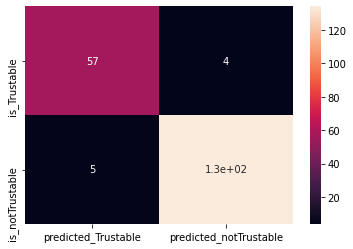

In [193]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

y_predict1 = svc_model.predict(X_train)
y_predict = svc_model.predict(X_test)
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test,y_predict,labels=[1,0]))
confusion = pd.DataFrame(cm,index=['is_Trustable', 'is_notTrustable'],
                    columns=['predicted_Trustable','predicted_notTrustable'])
confusion
sns.heatmap(confusion,annot=True)

In [194]:
#print(classification_report(y_train, y_predict1))

#print("test set prediction accuracy: {:.2f}".format(svc_model.score(X_test, y_predict)))
print(classification_report(y_test, y_predict))
print("training set accuracy: {:.2f}".format(svc_model.score(X_train, y_train)))
print("test set accuracy: {:.2f}".format(svc_model.score(X_test, y_test)))


              precision    recall  f1-score   support

           0       0.97      0.96      0.97       139
           1       0.92      0.93      0.93        61

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.96      0.95      0.96       200

training set accuracy: 0.93
test set accuracy: 0.95


In [140]:
model = SVC(kernel='rbf', probability=True, C=1000)
clf = model.fit(X_train, y_train)

    # Predict class labels on training data
pred_labels_tr = model.predict(X_train)
    # Predict class labels on a test data
pred_labels_te = model.predict(X_test)

    # Use score method to get accuracy of the model

score_te = model.score(X_test, y_test)

    # Look at classification report to evaluate the model
print(classification_report(y_test, pred_labels_te))



score_tr = model.score(X_train, y_train)
print("Training set Accuracy: {:.2f}".format(score_tr))
print('Test set Accuracy: {:.2f}'.format(score_te))
    # Look at classification report to evaluate the model


    

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       194
           1       0.95      0.92      0.94       106

    accuracy                           0.96       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.96      0.96      0.96       300

Training set Accuracy: 0.99
Test set Accuracy: 0.96


In [ ]:
print("Please enter the values")
TotalPeer = int(input("Total Peers: "))
EndorsingPeer = int(input( "Ratio of Endorsing peers to all peers(%): "))
BandwidthLimit = int(input( "Bandwidth Limit(Mbps): "))
new_input = [[TotalPeer,EndorsingPeer,BandwidthLimit]]  
predictions = svc_model.predict(new_input)
print(predictions)
if predictions == 1:
    print('Prediction: The input Endorsing peer set is Trustable peer set')
else:
    print('Prediction: The input Endorsing peer set is Non-Trustable peer set')


In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import svm, datasets
from sklearn import metrics
import plotly.graph_objs as go
from sklearn import datasets

dataset = pd.read_csv('/home/inlab/Documents/testdataforhyperledgerhigh.csv')
result = ['Trustable','Non-Trustable']

X = dataset.iloc[:,[0,1,2]].values

y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.svm import SVC
#svc_model = SVC(kernel='linear')
#svc_model.fit(X_train, y_train)

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x -svc.coef_[0][1]*y) / svc.coef_[0][2]


#tmp1 = np.linspace(0,100)
#tmp = np.linspace(-2,2,51)
tmp = np.linspace(10,100,51)
tmp1 = np.linspace(0,30)
#tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp1,tmp)

#fig = plt.figure() 
fig = go.FigureWidget()

fig.add_surface(x=x, y=y, z=z(x,y),colorscale='darkmint',opacity = 0.7, showscale=False)
fig.add_scatter3d(x=X_train[y_train==0,0], y=X_train[y_train==0,1], z=X_train[y_train==0,2],  mode='markers',marker_symbol='circle', marker={'color': 'red','size':3.5,'opacity':0.5}, name = "Non-trustable")
fig.add_scatter3d(x=X_train[y_train==1,0], y=X_train[y_train==1,1], z=X_train[y_train==1,2], mode='markers', marker_symbol='cross',marker={'color': 'blue','size':3.5}, name = "Trustable")
fig.update_layout(title='Plotting 3D Decision Boundary From Linear SVM',scene_aspectmode='cube',
scene ={'xaxis':{'title': 'Total Peers',},
'yaxis':{'title': 'Endorsing Peers(%)'},
'zaxis':{'title': 'Bandwidth Limit(Mbps)', 'range': [0,100]}})

fig.update_xaxes(
        title_font = {"size": 20}
        )
fig.show()

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import svm, datasets
from sklearn import metrics
import plotly.graph_objs as go
from sklearn import datasets

dataset = pd.read_csv('/home/inlab/Documents/testdataforhyperledgerhigh.csv')
result = ['Trustable','Non-Trustable']

X = dataset.iloc[:,[0,1,2]].values

y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)

from sklearn.svm import SVC
#svc_model = SVC(kernel='linear')
#svc_model.fit(X_train, y_train)
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x -svc.coef_[0][1]*y) / svc.coef_[0][2]


#tmp1 = np.linspace(0,100)
#tmp = np.linspace(-2,2,51)
tmp = np.linspace(10,130,51)
tmp1 = np.linspace(0,30,100)
#tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp1,tmp)

#fig = plt.figure() 
fig = go.FigureWidget()
fig.add_surface(x=x, y=y, z=z(x,y),colorscale='darkmint',opacity = 0.7, showscale=False)
fig.add_scatter3d(x=X_test[y_test==0,0], y=X_test[y_test==0,1], z=X_test[y_test==0,2],mode='markers',marker_symbol='circle', marker={'color': 'red','size':3.5,'opacity':0.5}, name = "Non-trustable")
fig.add_scatter3d(x=X_test[y_test==1,0], y=X_test[y_test==1,1], z=X_test[y_test==1,2],mode='markers', marker_symbol='cross',marker={'color': 'blue','size':3.5}, name = "Trustable")
fig.update_layout(title='Plotting 3D Decision Boundary From Linear SVM',scene_aspectmode='cube',
scene ={'xaxis':{'title': 'Total Peers',},
'yaxis':{'title': 'Endorsing Peers(%)'},
'zaxis':{'title': 'Bandwidth Limit(Mbps)', 'range': [0,100]}})

fig.update_xaxes(
        title_font = {"size": 20}
        )
fig.show()


Text(0, 0.5, 'Second Principal Component')

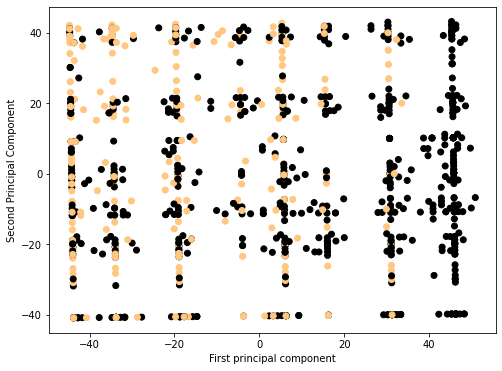

In [149]:
# PCA for 2 Dimensions Hyperledger Fabric
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import svm, datasets
from sklearn import metrics
import plotly.graph_objs as go
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('/home/inlab/Documents/testdataforhyperledgerhigh.csv')

X = dataset.iloc[:,[0,1,2]].values

Y = dataset.iloc[:, 4].values

pca = PCA(n_components=2)
scaler = StandardScaler()

X = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=Y,cmap='copper')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')




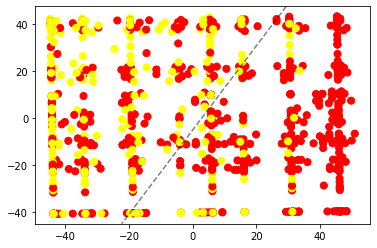

In [30]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
X = pca.fit_transform(X)  
clf = SVC(kernel='linear').fit(X, Y)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
plot_svc_decision_function(clf);

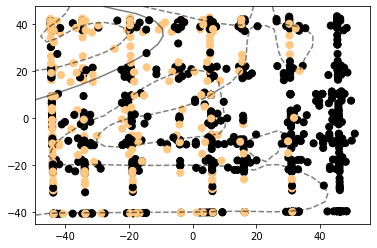

In [33]:
X = pca.fit_transform(X)
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))
from mpl_toolkits import mplot3d
clf = SVC(kernel='rbf',C=10000)


clf.fit(X, Y)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='copper')
plot_svc_decision_function(clf)



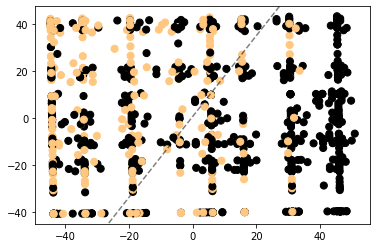

In [34]:
X = pca.fit_transform(X)
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))
from mpl_toolkits import mplot3d
clf = SVC(kernel='linear').fit(X, Y)


clf.fit(X, Y)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='copper')
plot_svc_decision_function(clf)

